In [1]:
!pip install opencv-python matplotlib



In [2]:
!pip install pillow

In [10]:
import os
from PIL import Image
import numpy as np

# Directories
image_dir = 'fox/images'
jacobian_dir = 'output/derivative'
output_dir = 'output/combined'

# Check and create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List image files in the image directory
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Iterate over each image file
for image_file in image_files:
    
    # Create the Jacobian filename by prefixing with "gradient_"
    jacobian_file_name = "gradient_" + image_file
    jacobian_file_path = os.path.join(jacobian_dir, jacobian_file_name)
    print(jacobian_file_path)
    
    if os.path.isfile(jacobian_file_path):
        
        # Open the image and its Jacobian
        with Image.open(os.path.join(image_dir, image_file)) as img, Image.open(jacobian_file_path) as jacobian:
            
            # Flip the Jacobian horizontally
            jacobian = jacobian.transpose(Image.FLIP_LEFT_RIGHT)
            
            # Convert images to numpy arrays
            img_np = np.array(img).astype(float) / 255.0
            jacobian_np = np.array(jacobian).astype(float) / 255.0

            # Check if Jacobian is transposed and transpose it back if necessary
            if jacobian_np.shape[:2] != img_np.shape[:2]:
                jacobian_np = np.transpose(jacobian_np, (1, 0))

            # Now that Jacobian is in the correct shape, broadcast it across RGB channels
            jacobian_rgb = np.stack([jacobian_np]*3, axis=-1)

            # Compute the weighted image
            weighted_image_np = img_np * jacobian_rgb

            # If you want the final image to be vertically aligned, transpose it
            weighted_image_np = np.transpose(weighted_image_np, (1, 0, 2))
            
            # Convert back to uint8 and save
            weighted_image = Image.fromarray((weighted_image_np * 255).astype(np.uint8))
            weighted_image.save(os.path.join(output_dir, image_file))

print("Processing complete!")

Processing complete!


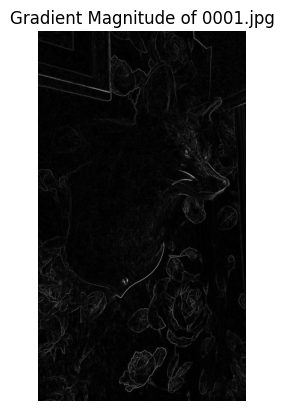

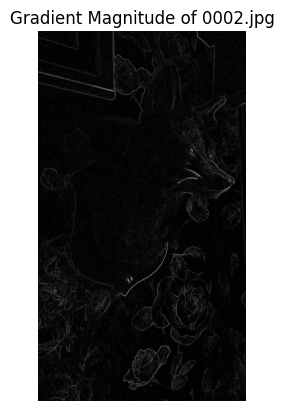

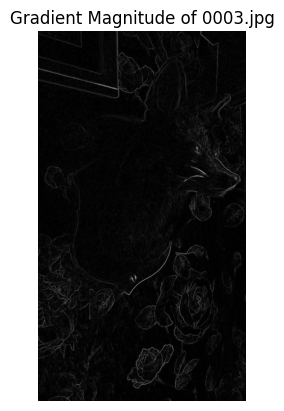

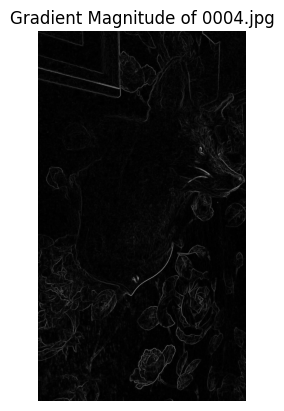

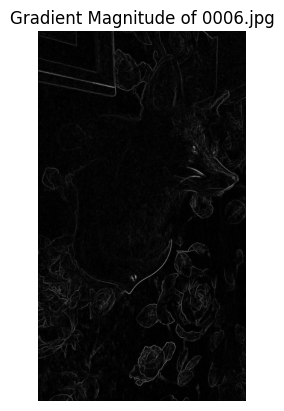

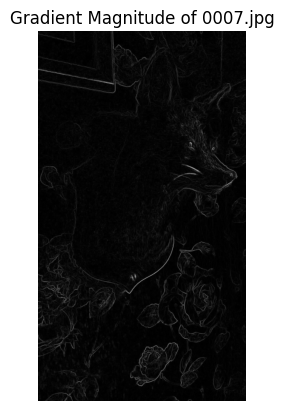

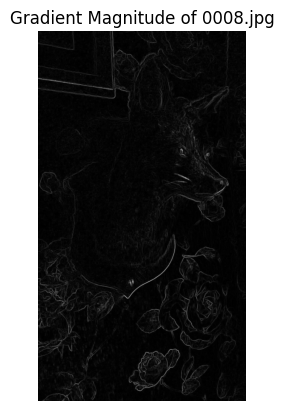

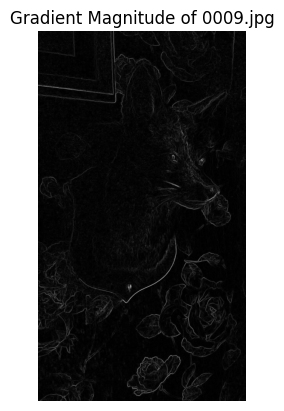

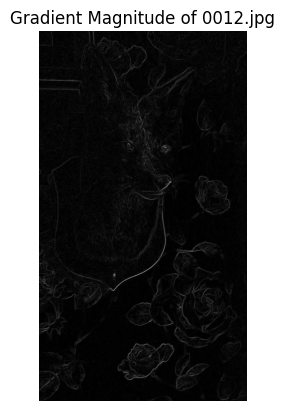

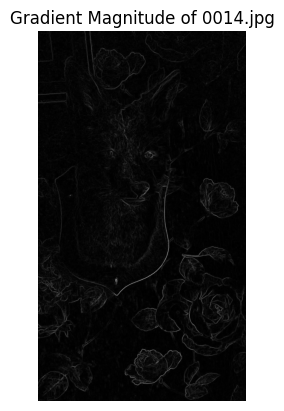

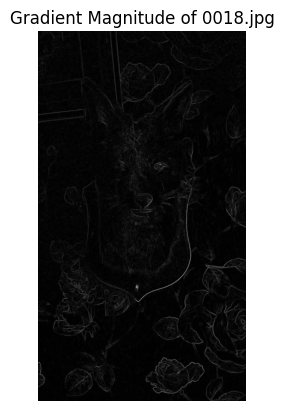

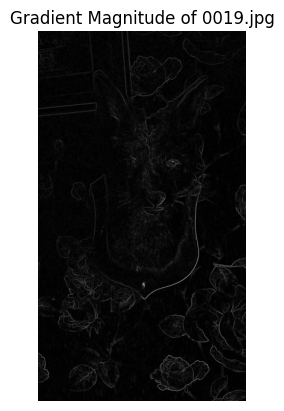

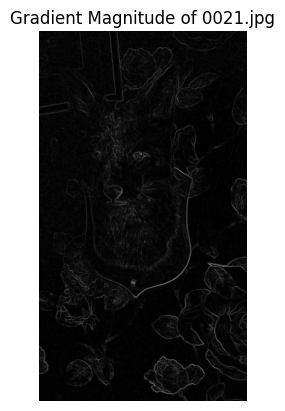

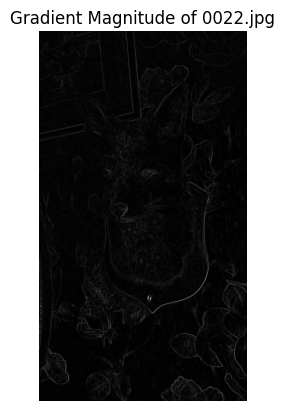

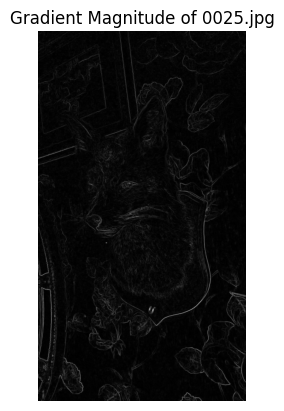

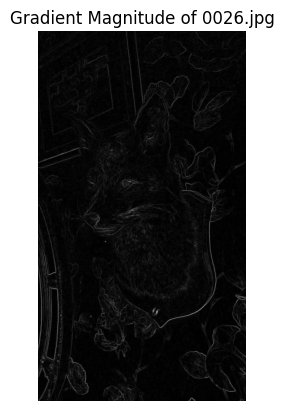

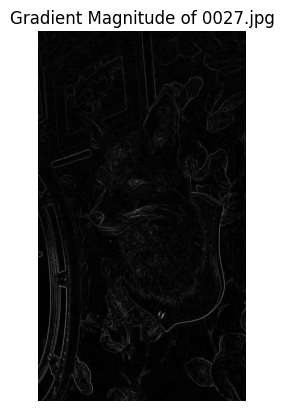

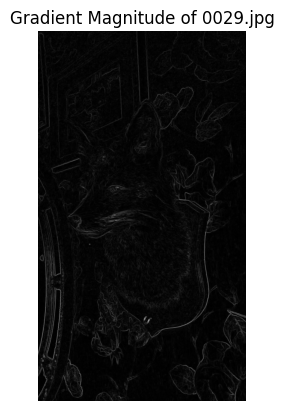

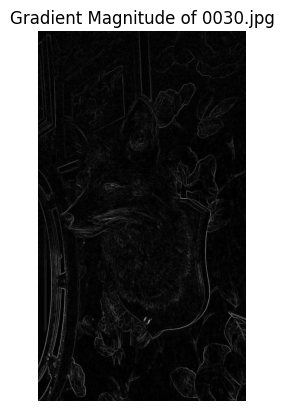

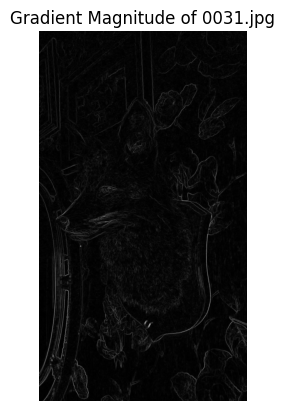

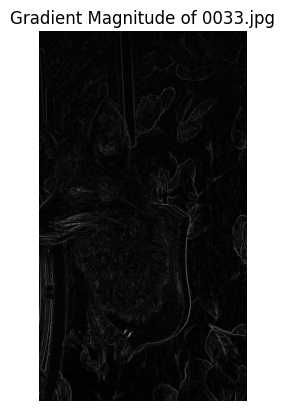

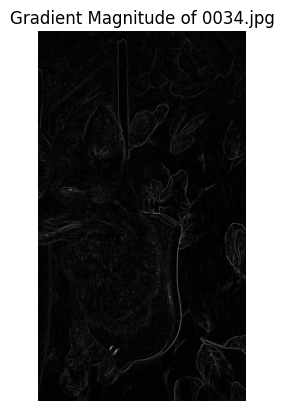

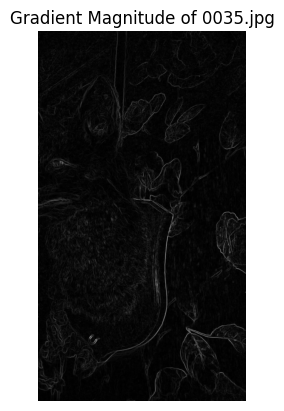

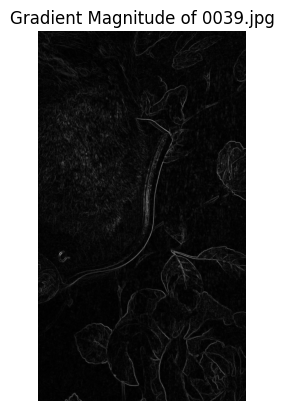

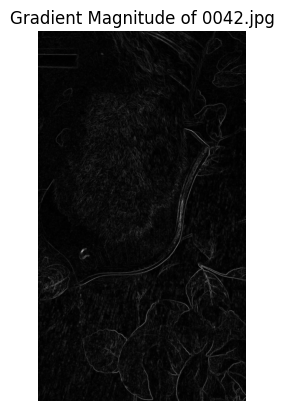

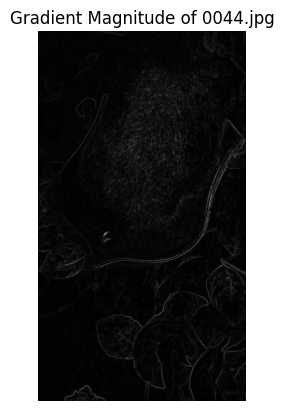

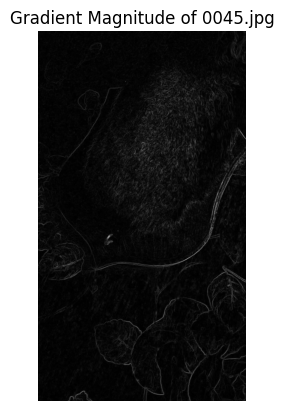

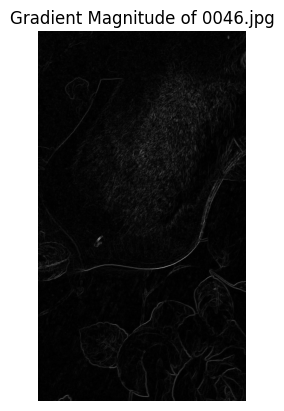

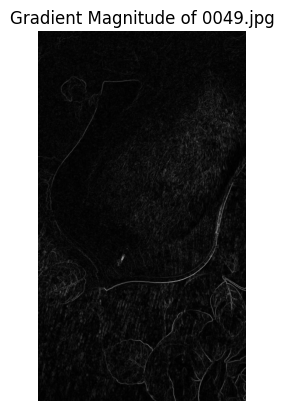

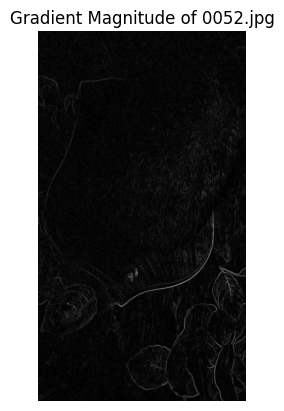

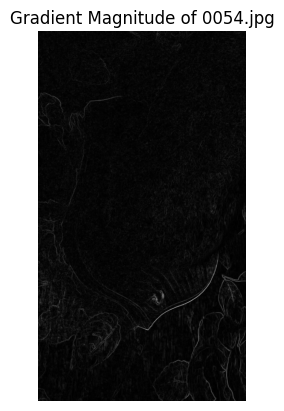

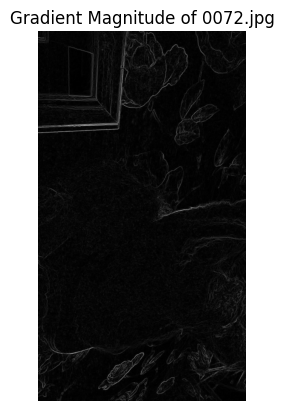

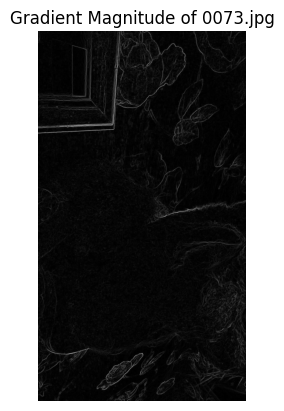

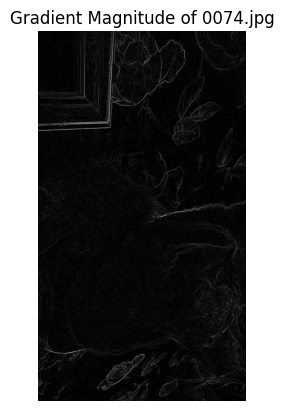

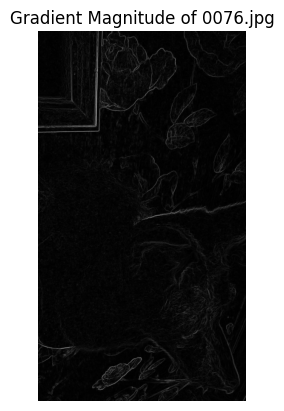

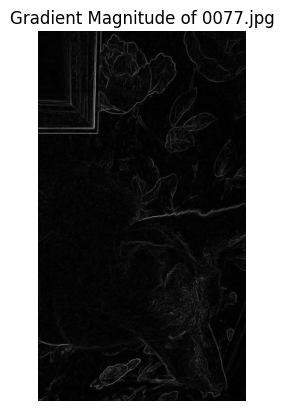

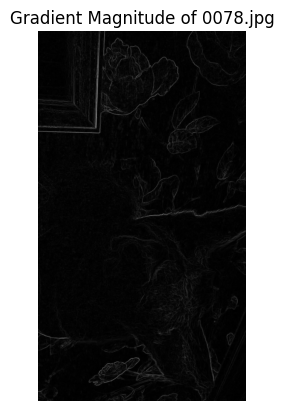

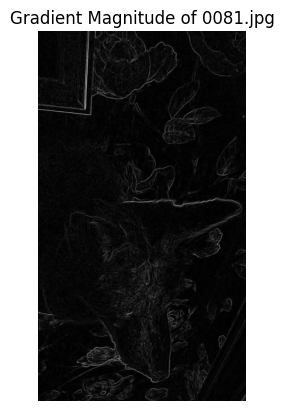

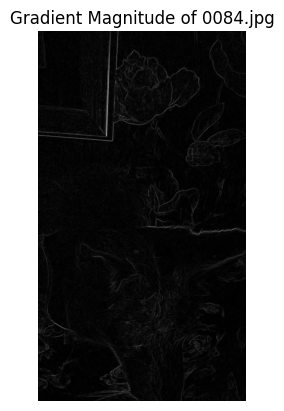

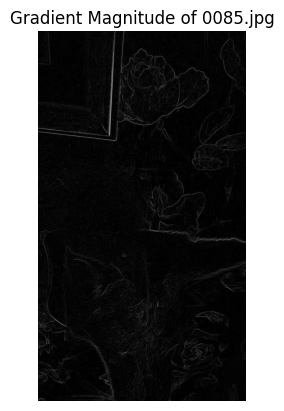

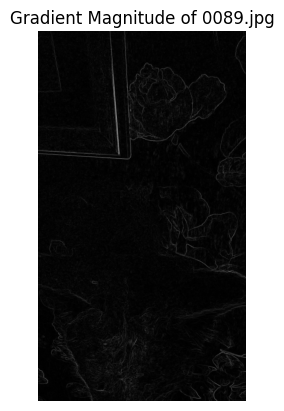

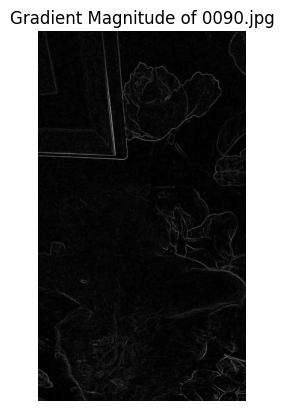

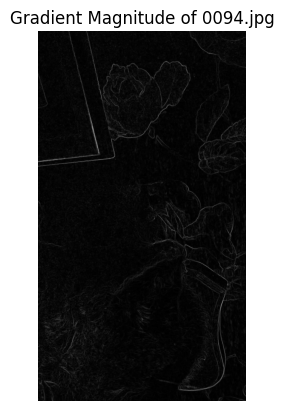

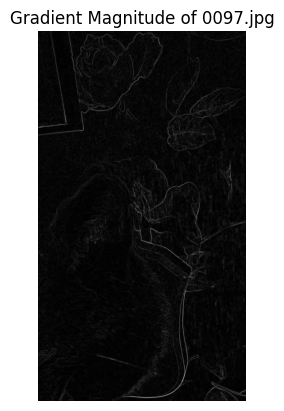

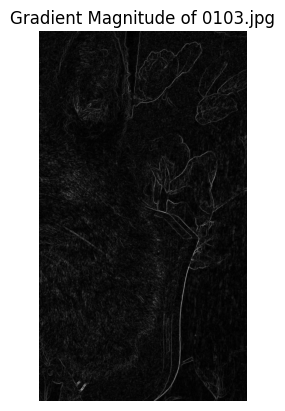

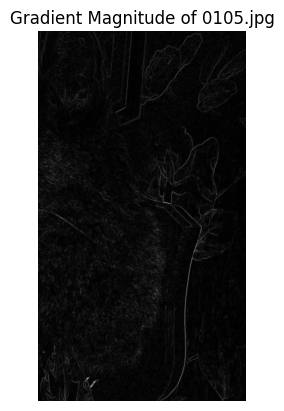

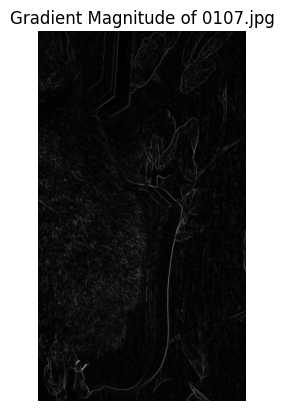

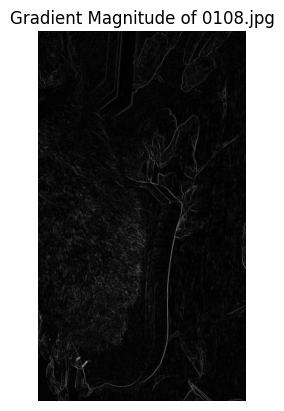

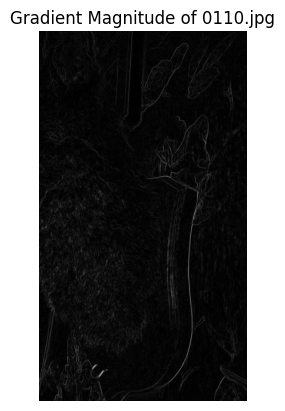

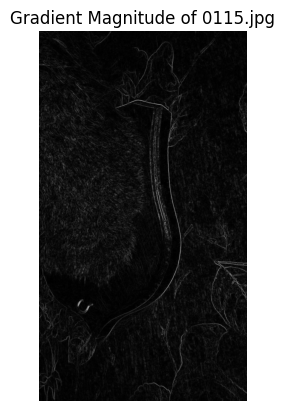

In [7]:
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt 

def compute_derivative(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = cv2.magnitude(grad_x, grad_y)
    return magnitude

def process_images(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    derivative_folder = output_folder
    
    if not os.path.exists(derivative_folder):
        os.makedirs(derivative_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(input_folder, filename)
            
            # Compute Derivative (Gradient Magnitude)
            magnitude = compute_derivative(image_path)
            derivative_output_path = os.path.join(derivative_folder + filename)
            cv2.imwrite(derivative_output_path, magnitude)
            
            # Display Gradient Magnitude
            plt.imshow(magnitude, cmap='gray')
            plt.title('Gradient Magnitude of ' + filename)
            plt.axis('off')
            plt.show()

input_folder = "fox/images"
output_folder = "foxDx"
process_images(input_folder, output_folder)
